In [28]:
import pandas as pd


import pandas as pd

from shapely.geometry import Point, Polygon, LineString, MultiPolygon
import numpy as np

import matplotlib.pyplot as plt

import geopandas as gpd
import numpy as np
import shapely

import pyproj
import chardet

from bokeh.models import (ColumnDataSource, Plot, Range1d, TapTool, CustomJS, 
                          LinearColorMapper, ColorBar, NumeralTickFormatter, HoverTool, 
                          Title, Label, LogColorMapper, EqHistColorMapper)
from bokeh.models.glyphs import Text
#from bokeh.palettes import brewer
#from bokeh.palettes import Category20
from bokeh.palettes import Greys256, Inferno256, Magma256, Plasma256
from bokeh.palettes import Viridis256, Cividis256, Turbo256
from bokeh.io import show, output_file, reset_output, output_notebook
from bokeh.plotting import figure
#from bokeh.embed import file_html
#from bokeh.layouts import column, row
from bokeh.tile_providers import get_provider, Vendors

In [2]:
df = pd.read_csv("data_filteredfor asia.csv")
df

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,10/12/2020,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658
...,...,...,...,...,...,...,...,...,...,...,...,...
61895,25/03/2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61896,24/03/2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61897,23/03/2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61898,22/03/2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN


In [3]:
df1 = df.drop(['day','month','year','countryterritoryCode'],axis=1)
df1

,dateRep,cases,deaths,countriesAndTerritories,geoId,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,746,6,Afghanistan,AF,38041757.0,Asia,9.013779
1,13/12/2020,298,9,Afghanistan,AF,38041757.0,Asia,7.052776
2,12/12/2020,113,11,Afghanistan,AF,38041757.0,Asia,6.868768
3,11/12/2020,63,10,Afghanistan,AF,38041757.0,Asia,7.134266
4,10/12/2020,202,16,Afghanistan,AF,38041757.0,Asia,6.968658
...,...,...,...,...,...,...,...,...
61895,25/03/2020,0,0,Zimbabwe,ZW,14645473.0,Africa,NaN
61896,24/03/2020,0,1,Zimbabwe,ZW,14645473.0,Africa,NaN
61897,23/03/2020,0,0,Zimbabwe,ZW,14645473.0,Africa,NaN
61898,22/03/2020,1,0,Zimbabwe,ZW,14645473.0,Africa,NaN


In [4]:
df2 = df1.sort_values(by ='continentExp', ascending = 1)
df2

,dateRep,cases,deaths,countriesAndTerritories,geoId,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
30949,24/10/2020,631,14,Kenya,KE,52573967.0,Africa,13.738739
24963,17/05/2020,0,0,Guinea_Bissau,GW,1920917.0,Africa,34.150356
24962,18/05/2020,77,1,Guinea_Bissau,GW,1920917.0,Africa,36.336812
24961,19/05/2020,0,0,Guinea_Bissau,GW,1920917.0,Africa,30.037737
24960,20/05/2020,48,2,Guinea_Bissau,GW,1920917.0,Africa,29.308919
...,...,...,...,...,...,...,...,...
10979,19/01/2020,0,0,Cases_on_an_international_conveyance_Japan,JPG11668,NaN,Other,NaN
10978,20/01/2020,0,0,Cases_on_an_international_conveyance_Japan,JPG11668,NaN,Other,NaN
10977,21/01/2020,0,0,Cases_on_an_international_conveyance_Japan,JPG11668,NaN,Other,NaN
10987,11/1/2020,0,0,Cases_on_an_international_conveyance_Japan,JPG11668,NaN,Other,NaN


In [5]:
df3 = df2[(df2.continentExp != 'Africa') & (df2.continentExp != 'Europe') & (df2.continentExp != 'America') & (df2.continentExp != 'Other') & (df2.continentExp != 'Oceania')]
df3

,dateRep,cases,deaths,countriesAndTerritories,geoId,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
55933,19/09/2020,0,0,Timor_Leste,TL,1293120.0,Asia,0.000000
55929,23/09/2020,0,0,Timor_Leste,TL,1293120.0,Asia,0.000000
55930,22/09/2020,0,0,Timor_Leste,TL,1293120.0,Asia,0.000000
55931,21/09/2020,0,0,Timor_Leste,TL,1293120.0,Asia,0.000000
55932,20/09/2020,0,0,Timor_Leste,TL,1293120.0,Asia,0.000000
...,...,...,...,...,...,...,...,...
35213,3/12/2020,851,2,Malaysia,MY,31949789.0,Asia,55.180333
35212,4/12/2020,1075,11,Malaysia,MY,31949789.0,Asia,54.507402
35211,5/12/2020,1141,0,Malaysia,MY,31949789.0,Asia,55.080176
35217,29/11/2020,1315,0,Malaysia,MY,31949789.0,Asia,53.105202


In [6]:
df4 = df3[(df3.countriesAndTerritories != 'Timor_Leste') & (df3.countriesAndTerritories != 'Nepal')]
df4

,dateRep,cases,deaths,countriesAndTerritories,geoId,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
60510,7/11/2020,6,0,Vietnam,VN,96462108.0,Asia,0.067384
60511,6/11/2020,0,0,Vietnam,VN,96462108.0,Asia,0.061164
60512,5/11/2020,4,0,Vietnam,VN,96462108.0,Asia,0.064274
60513,4/11/2020,11,0,Vietnam,VN,96462108.0,Asia,0.064274
60514,3/11/2020,12,0,Vietnam,VN,96462108.0,Asia,0.053907
...,...,...,...,...,...,...,...,...
35213,3/12/2020,851,2,Malaysia,MY,31949789.0,Asia,55.180333
35212,4/12/2020,1075,11,Malaysia,MY,31949789.0,Asia,54.507402
35211,5/12/2020,1141,0,Malaysia,MY,31949789.0,Asia,55.080176
35217,29/11/2020,1315,0,Malaysia,MY,31949789.0,Asia,53.105202


In [7]:
# Shows each country and its average number of cases
df4 = df3.groupby('countriesAndTerritories',as_index=False)['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'].mean()
# In[18]:
df4['countriesAndTerritories'] = df4.apply(lambda x: x['countriesAndTerritories'].replace('_',' '), axis=1)
df4

,countriesAndTerritories,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,Afghanistan,5.352608
1,Bahrain,223.512419
2,Bangladesh,15.683716
3,Bhutan,2.969699
4,Brunei Darussalam,1.260664
5,Cambodia,0.089633
6,China,0.266205
7,India,29.528471
8,Indonesia,9.063563
9,Iran,52.210230


In [31]:
shp = gpd.read_file('ne_50m_admin_0_countries.shp')

asia = shp[shp['continent']=='Asia']
asia = asia[asia['admin'].isin(df4['countriesAndTerritories'].values)]

asia['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'] = asia.apply(lambda x: 
                    df4[df4['countriesAndTerritories']==x['admin']]['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'].values[0], 
                                                                                axis=1)

result = asia.to_crs('EPSG:3857')
result = result.explode()

reset_output()
output_notebook()

x, y = [], []


[(x.append(list(polygon.exterior.coords.xy[0])), y.append(list(polygon.exterior.coords.xy[1]))) for polygon in result['geometry']]


#Greys256, Inferno256, Magma256, Plasma256
#Viridis256, Cividis256, Turbo256


TOOLS="hover,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select,"
palette = Turbo256
palette = palette[::-1]
min_range = result['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'].min()
max_range = result['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'].max()
#color_mapper = LinearColorMapper(palette = palette, low = min_range, high = max_range)
color_mapper = LogColorMapper(palette = palette, low = min_range, high = max_range)
#color_mapper = EqHistColorMapper(palette = palette, low = min_range, high = max_range)

# Create color bar.
format_tick = NumeralTickFormatter(format='0')
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=18, 
                     formatter=format_tick, border_line_color=None, location = (0, 0))

data_main = ColumnDataSource(dict(x = x, y = y,
                             confirmed_cases = result['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'],
                             name=result['admin']))


main_plot = figure(title = "Interactive map of COVID-19 cases" ,
                   tools='tap,reset,pan,wheel_zoom,zoom_in,zoom_out,box_zoom', match_aspect=True,
                   plot_width = 900,
                    x_range=(np.min(np.min(x)), np.max(np.max(x))), 
                   y_range=(np.min(np.min(y))-6000, np.max(np.max(y))+6000), 
                   x_axis_type='mercator', y_axis_type='mercator', output_backend="webgl")
                  #toolbar=TOOLS)

#tile_provider = get_provider(Vendors.STAMEN_TERRAIN_RETINA)
#tile_provider = get_provider(Vendors.CARTODBPOSITRON_RETINA)
#main_plot.add_tile(tile_provider)

regions = main_plot.patches('x', 'y', source = data_main, 
                    fill_color = {'field' : 'confirmed_cases', 
                                  'transform' : color_mapper},
                    line_color = 'black', line_width = 0.25, fill_alpha = 0.8)
                            #nonselection_fill_color=None,)





hover = HoverTool(renderers=[regions],tooltips=[
        ("Country", "@name"), ("Cases Per 100000","@confirmed_cases")]) # only for circles

main_plot.add_tools(hover)
main_plot.add_layout(color_bar, 'right')
main_plot.title.text_font_size='20pt'

#output_file("callback.html")

show(main_plot, notebook_handle=True)


Loading BokehJS ...

In [ ]:
# Shows each country and its average deaths
df5 = df3.groupby('countriesAndTerritories',as_index=False)['deaths'].mean()
# In[18]:
df5

,countriesAndTerritories,deaths
0,Afghanistan,5.797059
1,Bahrain,0.997135
2,Bangladesh,25.643636
3,Bhutan,0.000000
4,Brunei_Darussalam,0.010753
5,Cambodia,0.000000
6,China,13.540000
7,India,410.759312
8,Indonesia,54.865889
9,Iran,149.131429


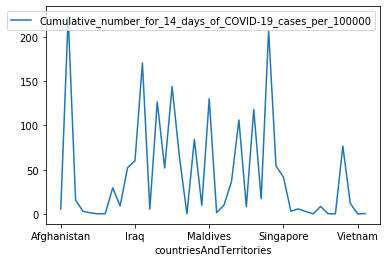

In [ ]:
# This shows the line graph for the number of cases in each asian country
fig = df4.plot.line(x="countriesAndTerritories",y="Cumulative_number_for_14_days_of_COVID-19_cases_per_100000")
fig

# This picture didnt make sense to me before but you should look at as the five countries are just five that were chosen 
# and all of the other countries are in between them.

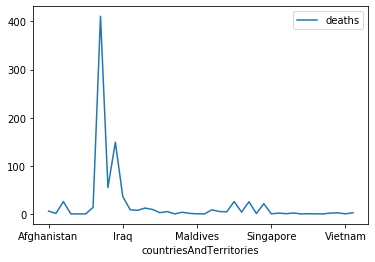

In [ ]:
#Thiss shows the number of deaths for each asian country. This might be good to present on since some countries
# have way more deaths than other countries.
fig = df5.plot.line(x="countriesAndTerritories",y="deaths")
fig

In [ ]:
conda install -c conda-forge/label/cf201901 folium

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: / 

In [ ]:
# import the library
import folium

# Make an empty map
m = folium.Map(location=[20,0], tiles="OpenStreetMap", zoom_start=2)

# Show the map
m